In [24]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import calinski_harabaz_score as ch
import numpy as np

import random

import seaborn as sns
sns.set()
%config InlineBackend.figure_format ='retina'

%cd ..
from LWEA import LWEA

In [92]:
x, _ = datasets.make_moons(n_samples=200, shuffle=False, noise=0.03, random_state=42)
df = pd.DataFrame(x).rename(columns={0:"x", 1:"y"})

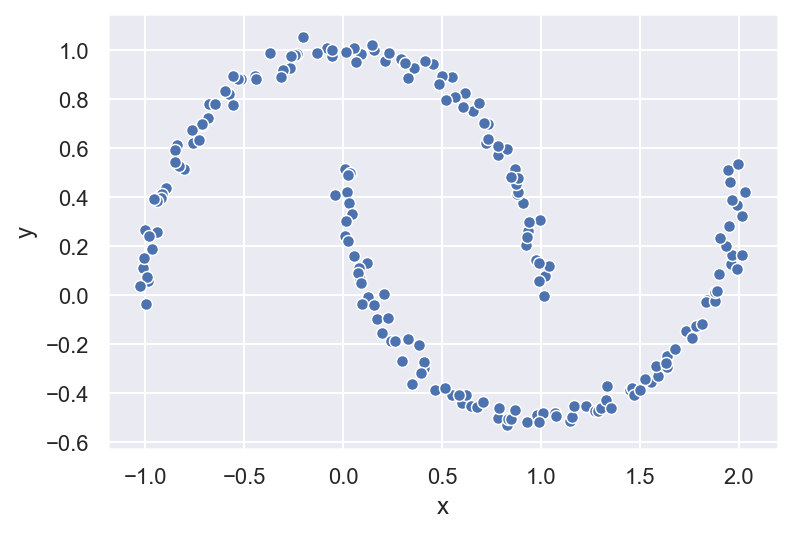

In [93]:
sns.scatterplot(df.x, df.y)

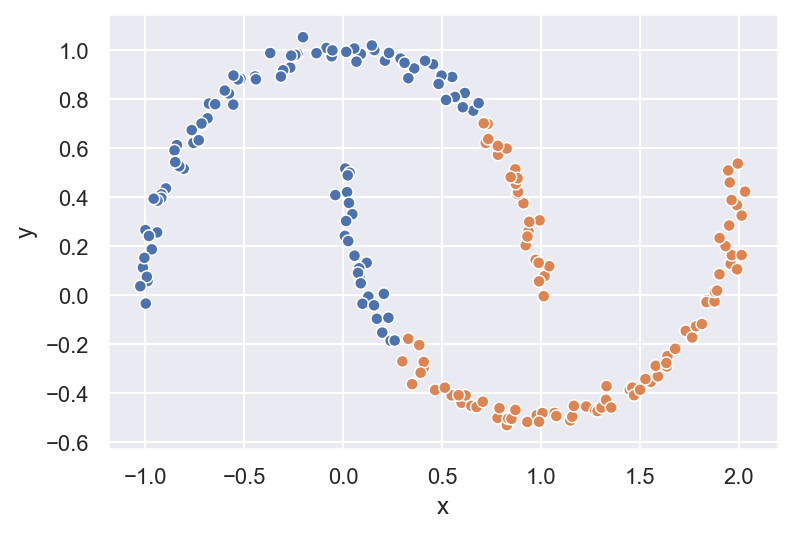

In [94]:
labels_kmeans = KMeans(n_clusters=2,init='random', n_init=1, algorithm='full').fit_predict(df)
sns.scatterplot(x=df.x, y=df.y, hue=labels_kmeans, legend=False)

In [95]:
labels_ensemble = np.array([KMeans(n_clusters=5).fit_predict(df) for _ in range(20)])

In [96]:
bcs, segments = LWEA.get_all_segs(labels_ensemble.T)
ECI = LWEA.compute_ECI(bcs, segments)
ca = LWEA.compute_LWCA(segments, ECI, bcs.shape[1])

In [98]:
res = LWEA.LWEA(ca, 2)

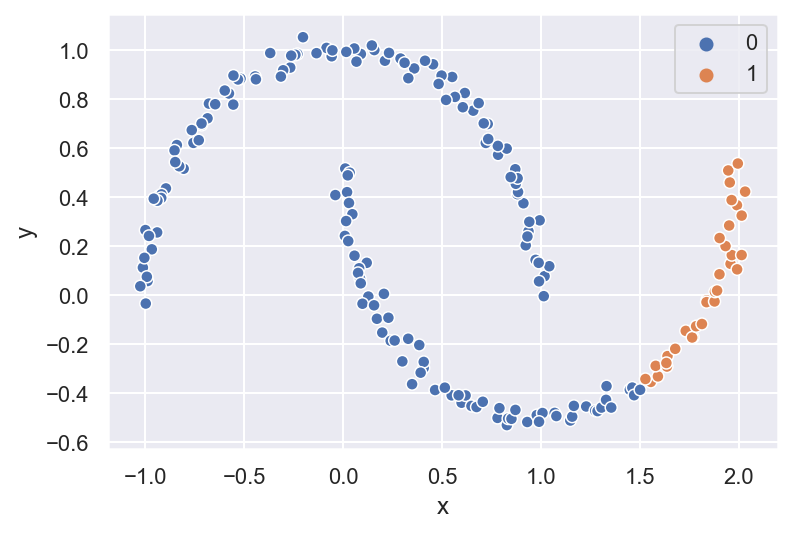

In [99]:
sns.scatterplot(df.x, df.y, hue=res)

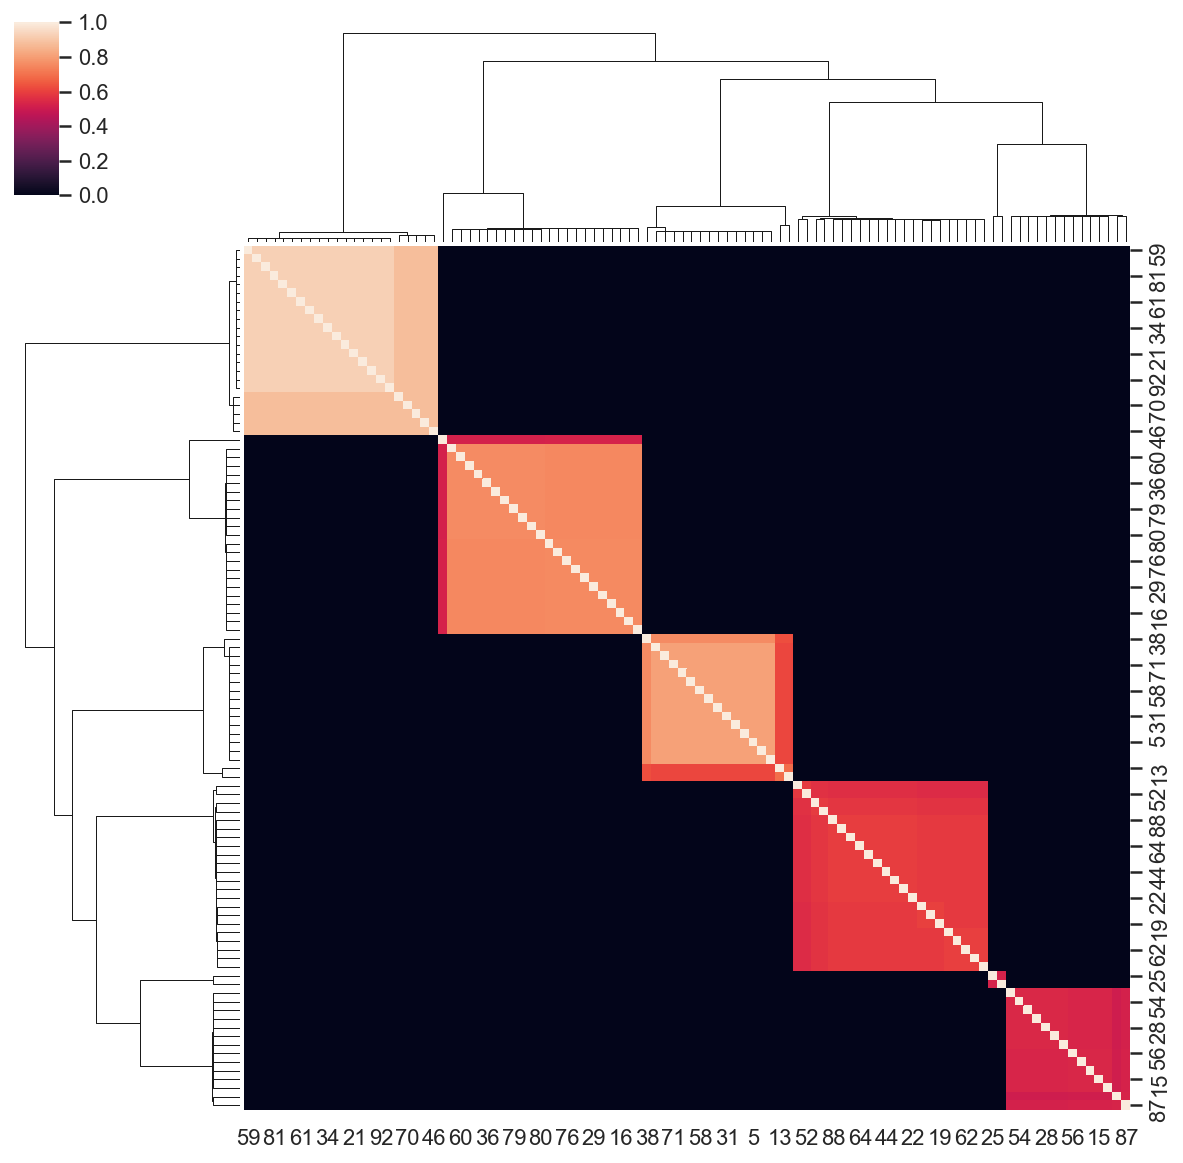

In [86]:
sns.clustermap(ca)